In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
import seaborn as sn
import itertools
from scipy import stats

from mlxtend.plotting import plot_decision_regions   #http://rasbt.github.io/mlxtend/installation/ 

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA



In [2]:
data=pd.read_csv('D_Train1.csv', sep = ',')

In [3]:
data.head()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,1,-62,-55,-65,-59,-69,-86,-87
1,1,-61,-56,-65,-65,-66,-77,-81
2,1,-62,-58,-57,-65,-70,-82,-91
3,1,-59,-57,-60,-60,-63,-81,-77
4,1,-69,-58,-56,-61,-73,-81,-93


In [4]:
data.describe()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.500000,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,1.118384,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,1.000000,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,1.750000,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,2.500000,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,3.250000,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,4.000000,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


In [5]:
data[data.isnull().any(axis=1)] #check if we have null data

#data=data.dropna() to drop null data if any

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7


In [6]:
data.isna().sum()

Location    0
WS1         0
WS2         0
WS3         0
WS4         0
WS5         0
WS6         0
WS7         0
dtype: int64

In [7]:
data.dtypes

Location    int64
WS1         int64
WS2         int64
WS3         int64
WS4         int64
WS5         int64
WS6         int64
WS7         int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16406910>,
      dtype=object)

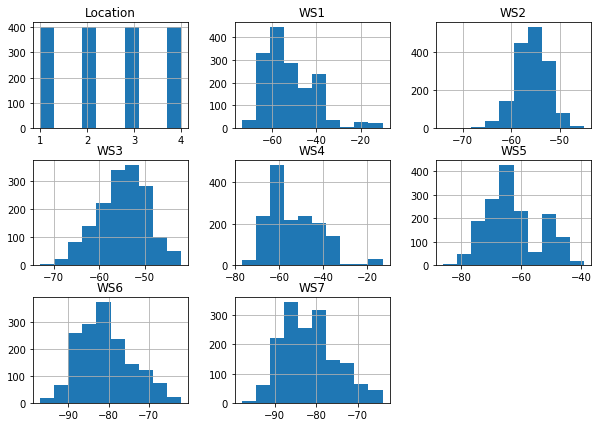

In [8]:
plt.rcParams['figure.figsize'] = [10,7]
data.hist()

In [9]:
train_label = data['Location']
train_data = data.drop('Location', axis=1)

In [10]:
train_label.shape, train_data.shape

((1600,), (1600, 7))

In [11]:
train_data.describe()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


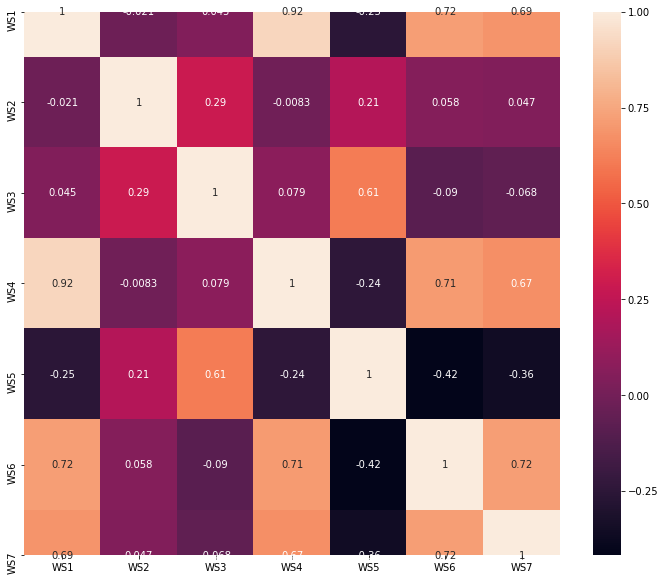

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
sn.heatmap(train_data.corr(), annot=True)

In [13]:
testdata=pd.read_csv('D_Test1.csv', sep = ',')

In [14]:
testdata.head()


,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,1,-64,-56,-61,-66,-71,-82,-81
1,1,-64,-55,-63,-66,-76,-88,-83
2,1,-65,-60,-59,-63,-76,-86,-82
3,1,-61,-59,-65,-63,-74,-89,-87
4,1,-67,-60,-66,-65,-75,-86,-87


In [15]:
test_label = testdata['Location']
test_data = testdata.drop('Location', axis=1)
test_data.shape, test_label.shape

((400, 7), (400,))

In [16]:
scaler=preprocessing.StandardScaler()
train_data_standard = scaler.fit_transform(train_data) 
test_data_standard = scaler.transform(test_data)

In [17]:
#scores = cross_val_score(clf, X, y, cv=5)
#scores = cross_validate(clf, X, y,scoring='precision_macro', cv=5,return_estimator=True)         

In [18]:
#train_data_db=data.drop('Location', axis=1)
train_data_df=pd.DataFrame(train_data, columns=train_data.columns)

In [19]:
train_data_standard_df=pd.DataFrame(train_data_standard, columns=train_data_df.columns)

In [20]:
train_data_standard_df.describe()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,-3.981988e-15,-1.524926e-15,-2.430001e-16,-1.106754e-16,1.353084e-15,5.555278e-16,-8.398837e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.910067e+00,-5.383658e+00,-3.417740e+00,-2.041105e+00,-2.571968e+00,-2.460131e+00,-2.500041e+00
25%,-7.644674e-01,-7.049180e-01,-5.759384e-01,-8.254184e-01,-6.977376e-01,-7.693854e-01,-6.605074e-01
50%,-2.357291e-01,-1.200755e-01,-7.578136e-03,-2.175753e-01,-1.464932e-01,-1.545688e-01,-2.006241e-01
75%,5.573783e-01,7.571883e-01,7.502355e-01,6.507721e-01,7.354978e-01,6.139521e-01,5.658481e-01
max,3.729808e+00,3.096558e+00,2.455316e+00,3.516318e+00,2.609729e+00,2.919515e+00,2.711970e+00


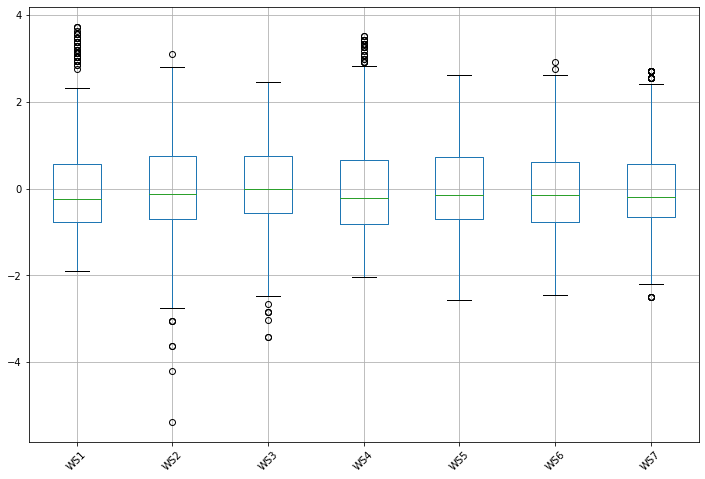

In [21]:
train_data_standard_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

In [22]:
z=np.abs(stats.zscore(train_data_standard))

In [23]:
#print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

In [24]:
#df["WS1"] = np.where(df["WS1"] <-64.0, -64.0,df['WS1'])
#df["WS1"] = np.where(df["WS1"] >-38.0, -38.0,df['WS1'])
print('skew1:',data['WS1'].skew())
print('skew2:',data['WS2'].skew())
print('skew3:',data['WS3'].skew())
print('skew4:',data['WS4'].skew())
print('skew5:',data['WS5'].skew())
print('skew6:',data['WS6'].skew())
print('skew7:',data['WS7'].skew())

skew1: 1.0616418498661164
skew2: -0.26360706418301216
skew3: -0.2588857304866265
skew4: 0.846194491503386
skew5: 0.3942235277409816
skew6: 0.43629642032775834
skew7: 0.48893599953670425


In [25]:
train_data.var(axis=0)

WS1    128.852408
WS2     11.701826
WS3     27.878324
WS4    132.704158
WS5     82.323376
WS6     42.354565
WS7     42.581287
dtype: float64

In [26]:
#from sklearn.preprocessing import minmax_scale

In [27]:
#train_scaled=pd.DataFrame(minmax_scale(train_data, feature_range=(0,10)), columns=train_data.columns)

In [28]:
clf_GNB=GaussianNB(priors=None)
GNB_pred = clf_GNB.fit(train_data_standard, train_label).predict(test_data_standard)
print("Total # of mislabeled points: %d out of %d" % ( (test_label != GNB_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with GNB:', accuracy_score(train_label,clf_GNB.predict(train_data_standard)))
print('***** Test Accuracy with GNB:', accuracy_score(test_label,clf_GNB.predict(test_data_standard)))

Total # of mislabeled points: 9 out of 400
***** Training Accuracy with GNB: 0.985
***** Test Accuracy with GNB: 0.9775


In [29]:
scores = cross_validate(clf_GNB, train_data_standard, train_label,scoring='precision_macro', cv=3,return_estimator=True) 
print('Cross_validate Score: ',scores)

Cross_validate Score:  {'fit_time': array([0.00467992, 0.00210214, 0.00151515]), 'score_time': array([0.00411105, 0.00212097, 0.00286579]), 'estimator': (GaussianNB(priors=None, var_smoothing=1e-09), GaussianNB(priors=None, var_smoothing=1e-09), GaussianNB(priors=None, var_smoothing=1e-09)), 'test_score': array([0.98361514, 0.99083506, 0.98354703])}


In [30]:
print(classification_report(test_label, GNB_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       100
           2       0.99      0.94      0.96       100
           3       0.93      0.98      0.96       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  94   6   0]
 [  1   1  98   0]
 [  0   0   0 100]]


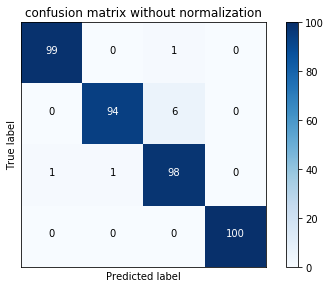

In [31]:
test_pred=clf_GNB.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.94 0.06 0.  ]
 [0.01 0.01 0.98 0.  ]
 [0.   0.   0.   1.  ]]


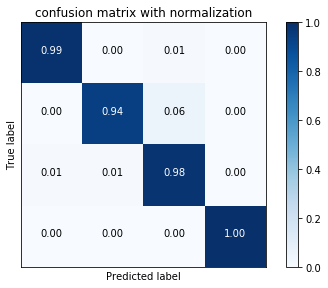

In [32]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_GNB.predict(test_data_standard)
cmap=plt.cm.Blues
classes = range(1-4)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [33]:
clf_svm=SVC().fit(train_data_standard, train_label) 
svm_pred = clf_svm.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d " % ( (test_label != svm_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with SVM:', accuracy_score(train_label,clf_svm.predict(train_data_standard)))
print('***** Test Accuracy with SVM:', accuracy_score(test_label,clf_svm.predict(test_data_standard)))

Total # of mislabeled points: 11 out of 400 
***** Training Accuracy with SVM: 0.9875
***** Test Accuracy with SVM: 0.9725


In [34]:
print(classification_report(test_label, svm_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       100
           2       0.97      0.95      0.96       100
           3       0.94      0.95      0.95       100
           4       0.99      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  95   5   0]
 [  1   3  95   1]
 [  0   0   0 100]]


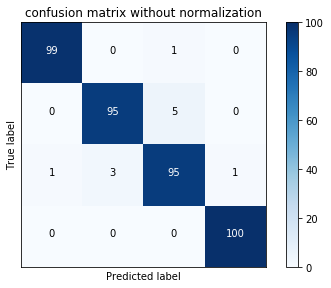

In [35]:
test_pred=clf_svm.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.95 0.05 0.  ]
 [0.01 0.03 0.95 0.01]
 [0.   0.   0.   1.  ]]


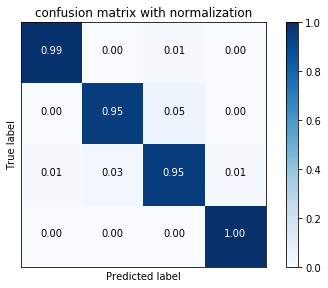

In [36]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_svm.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [37]:
C = [1, 5, 10, 50, 100, 1000]
gamma=[0, 1, 10, 20]

param_grid = {'C': C,
             'gamma': gamma}
             

svm_search = GridSearchCV(SVC(),param_grid,cv=3, return_train_score=True) # cv=3, return_train_score=True

svm_search.fit(train_data_standard, train_label)
svm_search.best_params_

{'C': 5, 'gamma': 1}

In [38]:
clf_svm_C=SVC(C=5, gamma=1).fit(train_data_standard, train_label) 
svm_C_pred = clf_svm_C.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != svm_C_pred).sum(), test_data_standard.shape[0]))
print('***** Training Accuracy with SVM :', accuracy_score(train_label,clf_svm_C.predict(train_data_standard)))
print('***** Test Accuracy with SVM :', accuracy_score(test_label,clf_svm_C.predict(test_data_standard)))

Total # of mislabeled points: 11 out of 400
***** Training Accuracy with SVM : 0.999375
***** Test Accuracy with SVM : 0.9725


In [39]:
print(classification_report(test_label, svm_C_pred))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       100
           2       0.94      0.97      0.96       100
           3       0.95      0.96      0.96       100
           4       1.00      0.98      0.99       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[98  1  1  0]
 [ 0 97  3  0]
 [ 0  4 96  0]
 [ 0  1  1 98]]


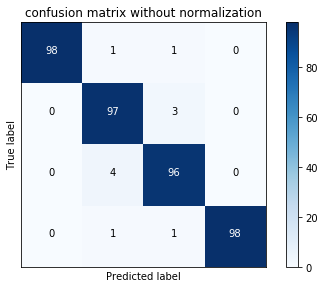

In [40]:
test_pred=clf_svm_C.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



confusion matrix with normalization
[[0.98 0.01 0.01 0.  ]
 [0.   0.97 0.03 0.  ]
 [0.   0.04 0.96 0.  ]
 [0.   0.01 0.01 0.98]]


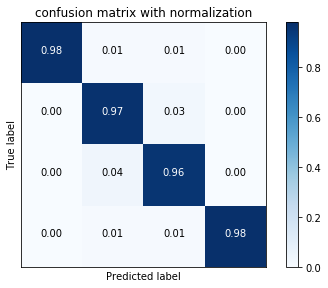

In [41]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_svm_C.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




In [42]:
linearSVM_model=LinearSVC(C=5,max_iter=10000, tol=1e-3, dual=False)
clf_linearSVM=linearSVM_model.fit(train_data_standard, train_label)

In [43]:
linearSVM_pred= linearSVM_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % (((test_label != linearSVM_pred).sum()),test_data_standard.shape[0]))

print('***** Training Accuracy with linearSVM:', accuracy_score(train_label,linearSVM_model.predict(train_data_standard)))
print('***** Test Accuracy with linearSVM:', accuracy_score(test_label,linearSVM_model.predict(test_data_standard)))

Total # of mislabeled points: 12 out of 400
***** Training Accuracy with linearSVM: 0.978125
***** Test Accuracy with linearSVM: 0.97


In [44]:
print(classification_report(test_label, linearSVM_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.93      0.96      0.95       100
           3       0.95      0.93      0.94       100
           4       1.00      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  96   4   0]
 [  0   7  93   0]
 [  0   0   0 100]]


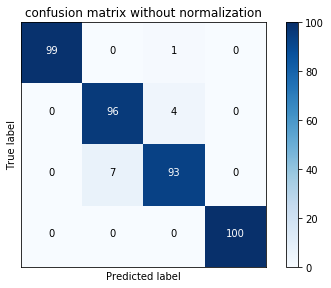

In [45]:
test_pred=clf_linearSVM.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.96 0.04 0.  ]
 [0.   0.07 0.93 0.  ]
 [0.   0.   0.   1.  ]]


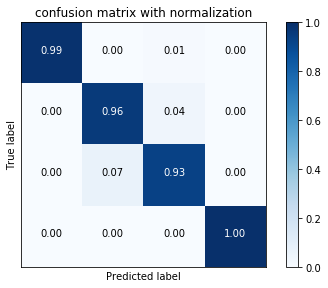

In [46]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_linearSVM.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





In [47]:
LDA_model=LinearDiscriminantAnalysis(solver='svd')
clf_LDA_model=LDA_model.fit(train_data_standard, train_label)

In [48]:
LDA_pred = LDA_model.fit(train_data_standard, train_label).predict(test_data_standard)

scores = cross_validate(LDA_model, train_data_standard, train_label,scoring='precision_macro', cv=3,return_estimator=True) 
print('Cross_validate Score: ',scores)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != LDA_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with LDA:', accuracy_score(train_label,LDA_model.predict(train_data_standard)))
print('***** Test Accuracy with LDA:', accuracy_score(test_label,LDA_model.predict(test_data_standard)))


Cross_validate Score:  {'fit_time': array([0.01, 0.  , 0.01]), 'score_time': array([0., 0., 0.]), 'estimator': (LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), 'test_score': array([0.97, 0.98, 0.97])}
Total # of mislabeled points: 12 out of 400
***** Training Accuracy with LDA: 0.9725
***** Test Accuracy with LDA: 0.97


In [49]:
print(classification_report(test_label, LDA_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       1.00      0.89      0.94       100
           3       0.89      1.00      0.94       100
           4       1.00      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  89  11   0]
 [  0   0 100   0]
 [  0   0   0 100]]


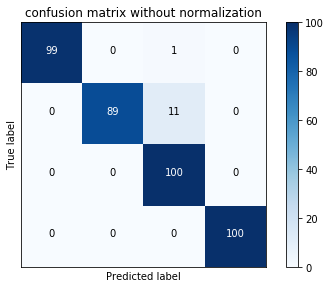

In [50]:
test_pred=clf_LDA_model.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.89 0.11 0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


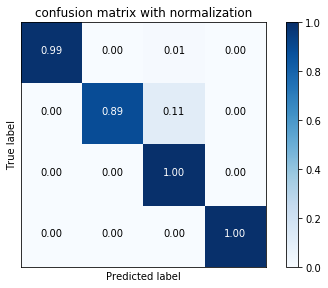

In [51]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_LDA_model.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [52]:
# check for dimension reduction

In [53]:
LDA_model=LinearDiscriminantAnalysis(solver='svd', n_components=3)
LDA_model.fit(train_data_standard, train_label)    

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [54]:
LDA_pred = LDA_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ((test_label != LDA_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with LDA:', accuracy_score(train_label,LDA_model.predict(train_data_standard)))
print('***** Test Accuracy with LDA:', accuracy_score(test_label,LDA_model.predict(test_data_standard)))

Total # of mislabeled points: 12 out of 400
***** Training Accuracy with LDA: 0.9725
***** Test Accuracy with LDA: 0.97


In [55]:
QDA_model=QuadraticDiscriminantAnalysis()
clf_QDA=QDA_model.fit(train_data_standard, train_label)

In [56]:
QDA_pred= QDA_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != QDA_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with QDA:', accuracy_score(train_label,QDA_model.predict(train_data_standard)))
print('***** Test Accuracy with QDA:', accuracy_score(test_label,QDA_model.predict(test_data_standard)))

Total # of mislabeled points: 6 out of 400
***** Training Accuracy with QDA: 0.980625
***** Test Accuracy with QDA: 0.985


In [57]:
scores = cross_validate(QDA_model, train_data_standard, train_label,scoring='precision_macro', cv=3,return_estimator=True) 
print('Cross_validate Score: ',scores)

Cross_validate Score:  {'fit_time': array([0., 0., 0.]), 'score_time': array([0., 0., 0.]), 'estimator': (QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)), 'test_score': array([0.98, 0.99, 0.98])}


In [58]:
print(classification_report(test_label, QDA_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.99      0.97      0.98       100
           3       0.97      0.98      0.98       100
           4       0.98      1.00      0.99       100

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



confusion matrix without normalization
[[ 99   0   0   1]
 [  0  97   3   0]
 [  0   1  98   1]
 [  0   0   0 100]]


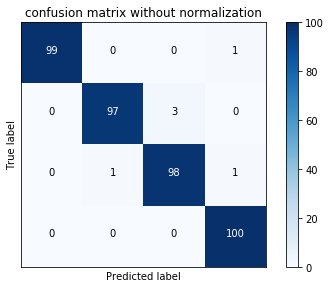

In [59]:
test_pred=clf_QDA.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

confusion matrix with normalization
[[0.99 0.   0.   0.01]
 [0.   0.97 0.03 0.  ]
 [0.   0.01 0.98 0.01]
 [0.   0.   0.   1.  ]]


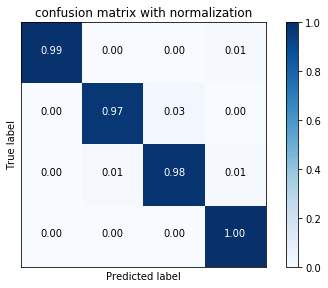

In [60]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_QDA.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





In [61]:
SGD_model=SGDClassifier(max_iter=10000, tol=1e-3)
clf_SGD=SGD_model.fit(train_data_standard, train_label)

In [62]:
SGD_pred= SGD_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != SGD_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with SGD:', accuracy_score(train_label,SGD_model.predict(train_data_standard)))
print('***** Test Accuracy with SGD:', accuracy_score(test_label,SGD_model.predict(test_data_standard)))

Total # of mislabeled points: 14 out of 400
***** Training Accuracy with SGD: 0.98125
***** Test Accuracy with SGD: 0.965


In [63]:
scores = cross_validate(SGD_model, train_data_standard, train_label,scoring='precision_macro', cv=3,return_estimator=True) 
print('Cross_validate Score: ',scores)

Cross_validate Score:  {'fit_time': array([0.01, 0.01, 0.01]), 'score_time': array([0., 0., 0.]), 'estimator': (SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), SGDClassifier(alpha=0.0001, average=

In [64]:
print(classification_report(test_label, SGD_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.94      0.94      0.94       100
           3       0.93      0.93      0.93       100
           4       0.99      1.00      1.00       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  94   6   0]
 [  0   6  93   1]
 [  0   0   0 100]]


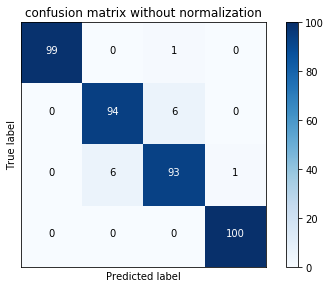

In [65]:
test_pred=clf_SGD.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)

cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.94 0.06 0.  ]
 [0.   0.06 0.93 0.01]
 [0.   0.   0.   1.  ]]


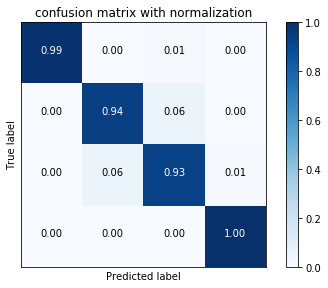

In [66]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_SGD.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





In [67]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
clf_KNN=KNN_model.fit(train_data_standard, train_label)

In [68]:
KNN_pred= KNN_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != KNN_pred).sum(), test_data_standard.shape[0]))

print('***** Training Accuracy with KNN:', accuracy_score(train_label,KNN_model.predict(train_data_standard)))
print('***** Test Accuracy with KNN:', accuracy_score(test_label,KNN_model.predict(test_data_standard)))

Total # of mislabeled points: 5 out of 400
***** Training Accuracy with KNN: 0.99125
***** Test Accuracy with KNN: 0.9875


In [69]:
n_neighbors = [1, 2, 3, 4, 5, 6]


param_grid = {'n_neighbors': n_neighbors}
             
             
KNN_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=3, return_train_score=True) # cv=3, return_train_score=True

KNN_search.fit(train_data_standard, train_label)
KNN_search.best_params_

{'n_neighbors': 3}

In [70]:
print(classification_report(test_label, KNN_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       0.99      0.97      0.98       100
           3       0.96      0.99      0.98       100
           4       1.00      0.99      0.99       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



confusion matrix without normalization
[[100   0   0   0]
 [  0  97   3   0]
 [  0   1  99   0]
 [  0   0   1  99]]


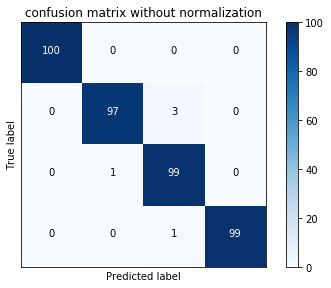

In [71]:
test_pred=clf_KNN.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[1.   0.   0.   0.  ]
 [0.   0.97 0.03 0.  ]
 [0.   0.01 0.99 0.  ]
 [0.   0.   0.01 0.99]]


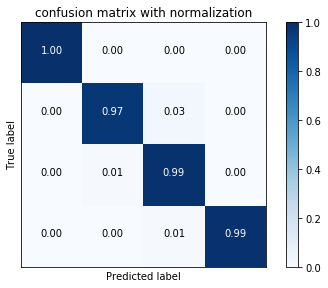

In [72]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_KNN.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





In [73]:
clf_RF=RandomForestClassifier(n_estimators=500,max_depth=20).fit(train_data_standard, train_label) 
RF_pred = clf_RF.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ( (test_label != RF_pred).sum(), test_data_standard.shape[0]))
print('***** Training Accuracy with RF:', accuracy_score(train_label,clf_RF.predict(train_data_standard)))
print('***** Test Accuracy with RF:', accuracy_score(test_label,clf_RF.predict(test_data_standard)))

Total # of mislabeled points: 10 out of 400
***** Training Accuracy with RF: 1.0
***** Test Accuracy with RF: 0.975


In [74]:
n_estimators = [50, 100, 500, 700, 1000]
max_depth=[None, 5, 10, 20, 30, 40, 50]

param_grid = {'n_estimators': n_estimators,
             'max_depth': max_depth}
             

RF_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=3, return_train_score=True) #3 fold, and checkes with accurracy rate

RF_search.fit(train_data_standard, train_label)
RF_search.best_params_

{'max_depth': 30, 'n_estimators': 500}

In [75]:
clf_RF=RandomForestClassifier(n_estimators=100,max_depth=30).fit(train_data_standard, train_label) 
RF_pred = clf_RF.fit(train_data_standard, train_label).predict(test_data_standard)

print("Total # of mislabeled points: %d out of %d" % ((test_label != RF_pred).sum(), test_data_standard.shape[0]))
print('***** Training Accuracy with RF:', accuracy_score(train_label,clf_RF.predict(train_data_standard)))
print('***** Test Accuracy with RF:', accuracy_score(test_label,clf_RF.predict(test_data_standard)))



Total # of mislabeled points: 7 out of 400
***** Training Accuracy with RF: 1.0
***** Test Accuracy with RF: 0.9825


In [76]:
print(classification_report(test_label, RF_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.97      0.97      0.97       100
           3       0.96      0.97      0.97       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  97   3   0]
 [  0   3  97   0]
 [  0   0   0 100]]


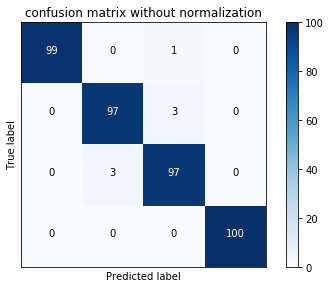

In [77]:
test_pred=clf_RF.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


#classes=['Location1', 'Location2', 'Location3', 'Location4' ]
classes=range(0-3)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.97 0.03 0.  ]
 [0.   0.03 0.97 0.  ]
 [0.   0.   0.   1.  ]]


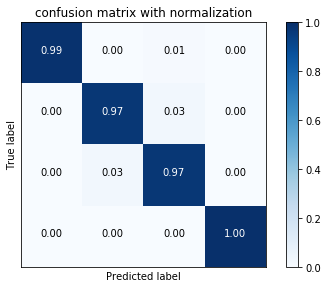

In [78]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_RF.predict(test_data_standard)
cmap=plt.cm.Blues
#classes=['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7' ]
classes = range(0-6)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [79]:
linear_model=LinearRegression()
linear_model.fit(train_data_standard, train_label)
linear_pred = linear_model.predict(test_data_standard)

In [80]:
r_square_train =linear_model.score(train_data_standard, train_label) #R^2
print ('r_square_train:',r_square_train )

r_square_train: 0.7811856200453733


In [81]:
r_square_test =linear_model.score(test_data_standard, test_label) #R^2
print ('r_square_test:',r_square_test )

r_square_test: 0.7840697747806398


In [82]:
linear_model_mse = mean_squared_error(linear_pred, test_label)
print ('linear_model_mse', linear_model_mse)

linear_model_mse 0.2699127815242004


In [83]:
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(train_data_standard, train_label)

In [84]:
logistic_pred = logistic_model.predict(test_data_standard)
print("Total # of mislabeled points: %d out of %d" % ((test_label != logistic_pred).sum(), test_data_standard.shape[0]))
print('***** Training Accuracy with RF:', accuracy_score(train_label,logistic_model.predict(train_data_standard)))
print('***** Test Accuracy with RF:', accuracy_score(test_label,logistic_model.predict(test_data_standard)))

Total # of mislabeled points: 14 out of 400
***** Training Accuracy with RF: 0.970625
***** Test Accuracy with RF: 0.965


In [85]:
print(classification_report(test_label, logistic_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.92      0.95      0.94       100
           3       0.94      0.92      0.93       100
           4       1.00      1.00      1.00       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  95   5   0]
 [  0   8  92   0]
 [  0   0   0 100]]


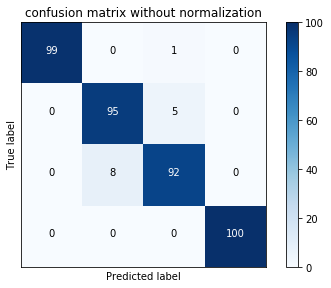

In [86]:
test_pred=logistic_model.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.95 0.05 0.  ]
 [0.   0.08 0.92 0.  ]
 [0.   0.   0.   1.  ]]


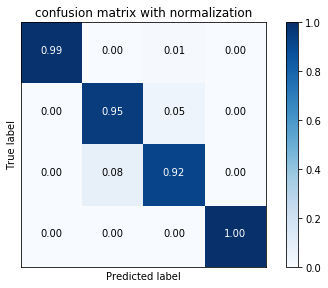

In [87]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=logistic_model.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





In [88]:
params = {'n_estimators':500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr_model= GradientBoostingRegressor(**params)
gbr_model.fit(train_data_standard, train_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
gbr_model.score(train_data_standard, train_label)

0.9986634100863883

In [90]:
gbr_predict = gbr_model.predict(test_data_standard)
gbr_r_square = gbr_model.score(test_data_standard, test_label)
gbr_r_square 

0.968033647772184

In [91]:
num_estimators = [100, 200, 500]
learn_rates=[0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
             'learning_rate': learn_rates,
             'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split = 2, loss = 'ls'),
                          param_grid, cv=3, return_train_score=True)

grid_search.fit(train_data_standard, train_label)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [92]:
params = {'n_estimators':500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr_model= GradientBoostingRegressor(**params)
gbr_model.fit(train_data_standard, train_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
gbr_model.score(train_data_standard, train_label)

0.990945571441357

In [94]:
gbr_predict = gbr_model.predict(test_data_standard)
gbr_r_square = gbr_model.score(test_data_standard, test_label)
gbr_r_square 

0.9704807208694596

In [95]:
gbr_model_mse = mean_squared_error(gbr_predict, test_label)
gbr_model_mse

0.03689909891317551

In [96]:
#PCA

In [97]:
pca=PCA(n_components=2)
pca.fit_transform(train_data_standard)

array([[-1.06,  1.88],
       [-0.26,  1.81],
       [-1.37,  1.41],
       ...,
       [-1.17, -0.63],
       [-2.23, -0.5 ],
       [-1.72, -1.62]])

In [98]:
pca.explained_variance_ratio_ #gives magnitude of variation for each component in %

array([0.49, 0.24])

In [99]:
X_train=pca.fit_transform(train_data_standard)
Y_train=train_label
x_test=pca.transform(test_data_standard)
y_test=test_label




In [100]:
clf_RF_pca = RandomForestClassifier(n_estimators=500, max_depth=20).fit(X_train, Y_train) 

accuracy = clf_RF_pca.score(x_test, y_test)
print(accuracy)

0.89


In [101]:
RF_pred_pca = clf_RF_pca.fit(X_train, Y_train).predict(x_test)

print("Total # of mislabeled points: %d out of %d" % ( (y_test != RF_pred_pca).sum(),x_test.shape[0]))
print('***** Training Accuracy with RF:', accuracy_score(Y_train,clf_RF_pca.predict(X_train)))
print('***** Test Accuracy with RF:', accuracy_score(y_test,clf_RF_pca.predict(x_test)))




Total # of mislabeled points: 42 out of 400
***** Training Accuracy with RF: 1.0
***** Test Accuracy with RF: 0.895


In [102]:
n_estimators = [50, 100, 500, 700, 1000]
max_depth=[None, 5, 10, 20, 30, 40, 50]

param_grid = {'n_estimators': n_estimators,
             'max_depth': max_depth}
             

RF_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=3, return_train_score=True) #3 fold, and checkes with accurracy rate

RF_search.fit(X_train, Y_train)
RF_search.best_params_

{'max_depth': 5, 'n_estimators': 700}

In [103]:
print(classification_report(y_test, RF_pred_pca))

              precision    recall  f1-score   support

           1       0.87      0.86      0.86       100
           2       0.95      0.93      0.94       100
           3       0.80      0.80      0.80       100
           4       0.96      0.99      0.98       100

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.89      0.90      0.89       400



confusion matrix without normalization
[[85  0 14  1]
 [ 0 92  8  0]
 [12  5 80  3]
 [ 1  0  0 99]]


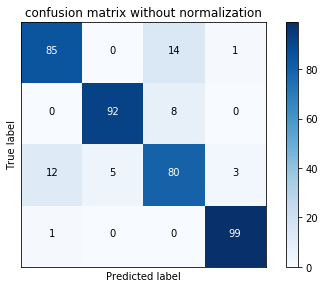

In [104]:
test_pred=clf_RF_pca.fit(X_train, Y_train).predict(x_test)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.85 0.   0.14 0.01]
 [0.   0.93 0.07 0.  ]
 [0.12 0.06 0.79 0.03]
 [0.01 0.   0.   0.99]]


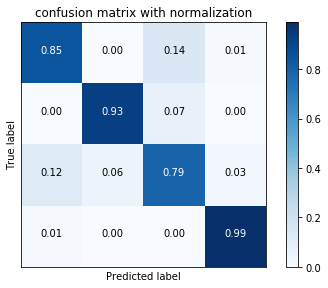

In [105]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_RF_pca.fit(X_train, Y_train).predict(x_test)
cmap=plt.cm.Blues
classes = range(1-4)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





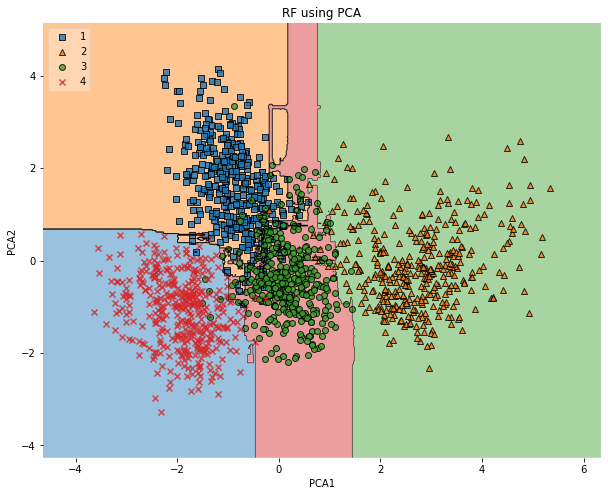

In [106]:
fig = plt.figure(figsize=(10,8))
# Plotting decision regions
plot_decision_regions(X_train, Y_train.to_numpy(), clf=clf_RF_pca, legend=2)

# Adding axes annotations
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('RF using PCA')
plt.show()

In [107]:
clf_svm_pca=SVC(C=5, gamma=1).fit(X_train, Y_train) 
svm_pred_pca = clf_svm_pca.fit(X_train, Y_train).predict(x_test)

print("Total # of mislabeled points: %d out of %d" % ( (y_test != svm_pred_pca).sum(), x_test.shape[0]))

print('***** Training Accuracy with SVM:', accuracy_score(Y_train,clf_svm_pca.predict(X_train)))
print('***** Test Accuracy with SVM:', accuracy_score(y_test,clf_svm_pca.predict(x_test)))

Total # of mislabeled points: 39 out of 400
***** Training Accuracy with SVM: 0.935625
***** Test Accuracy with SVM: 0.9025


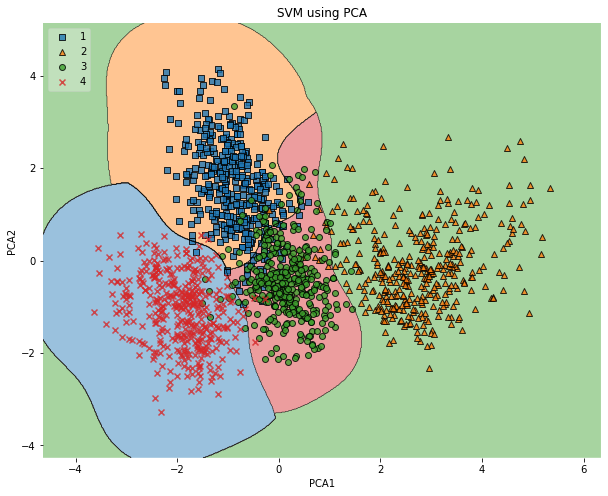

In [108]:

fig = plt.figure(figsize=(10,8))
# Plotting decision regions
plot_decision_regions(X_train, Y_train.to_numpy(), clf=clf_svm_pca, legend=2)

# Adding axes annotations
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM using PCA')
plt.show()